In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Use Lasso or Ridge if regularization needed
from sklearn.metrics import mean_squared_error, r2_score


Data Collection and Processing

In [110]:
car_dataset = pd.read_csv(r"C:\Users\matam\Downloads\archive\car data.csv")


In [111]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [112]:
car_dataset.shape

(301, 9)

In [113]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [114]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [115]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding The Categorical Data

In [116]:
# Replace with numerical encoding
car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)


C:\Users\matam\AppData\Local\Temp\ipykernel_4372\1370971896.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
C:\Users\matam\AppData\Local\Temp\ipykernel_4372\1370971896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
C:\Users\matam\AppData\Local\Temp\ipykernel_4372\1370971896.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be r

In [117]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Spliting the data and Traget

In [118]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [119]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [120]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Spliting Training and Test data

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)


Linear Regression

In [122]:
from sklearn.linear_model import LinearRegression


lin_reg_model = LinearRegression()

In [123]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Load data
data = pd.read_csv(r"C:\Users\matam\Downloads\archive\car data.csv")

# Step 2: Select features and target
X = data[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
Y = data['Selling_Price']

# Step 3: Define categorical columns
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']

# Step 4: Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# Step 5: Final pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 6: Split and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)
model.fit(X_train, Y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Model Evaluation

In [124]:

training_data_prediction = model.predict(X_train)
testing_data_prediction = model.predict(X_test)


from sklearn.metrics import r2_score, mean_squared_error

print("Training R² Score:", r2_score(Y_train, training_data_prediction))
print("Testing R² Score:", r2_score(Y_test, testing_data_prediction))
print("Testing MSE:", mean_squared_error(Y_test, testing_data_prediction))


Training R² Score: 0.8826805250490882
Testing R² Score: 0.8693753727250833
Testing MSE: 1.7186035913136637


Visualize the actual Prices and Predicated prices

In [125]:
!pip install matplotlib


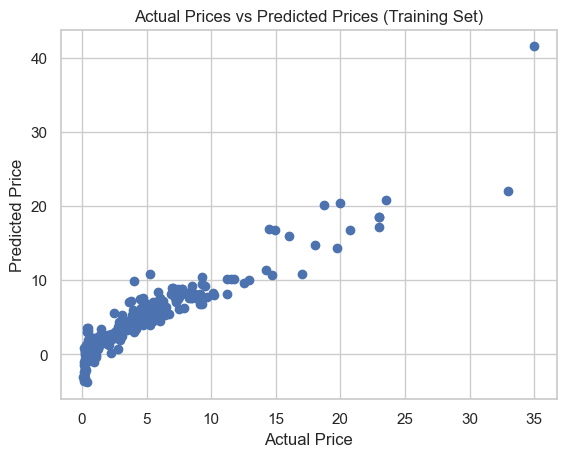

In [126]:
import matplotlib.pyplot as plt

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Training Set)")
plt.show()


In [127]:
from sklearn.metrics import r2_score

error_score = r2_score(Y_test, testing_data_prediction)
print("R² Score:", error_score)


R² Score: 0.8693753727250833


In [128]:
from sklearn import metrics

error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R² Score:", error_score)


R² Score: 0.8693753727250833


In [129]:
!pip install seaborn


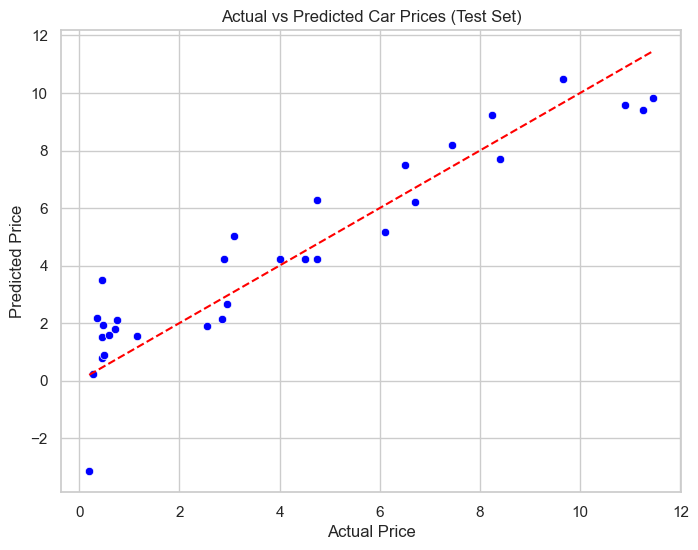

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for styling

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test, y=testing_data_prediction, color='blue')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Test Set)")

# Optional: plot reference line (perfect prediction line)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')

plt.show()


Lasso regression

In [131]:
from sklearn.linear_model import Lasso

lass_reg_model = Lasso()


In [132]:
lass_reg_model = Lasso()


In [133]:
lass_reg_model.fit(X=train,Y_train)
Lasso(alpha=1.0, copy_X=True, fit_intercept==True, max_iter=1000,
      normalize=False,positive=False, precompute=False,random_state=None,
      selection='cyclic',tol-0.0001, warm_start=False)

SyntaxError: positional argument follows keyword argument (4076522217.py, line 1)

Model Evalution

In [ ]:
training_data_prediction = model.predict(X_train)


In [ ]:
error_score=metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.8826805250490882


Visualize the actual prices and Predicted prices 

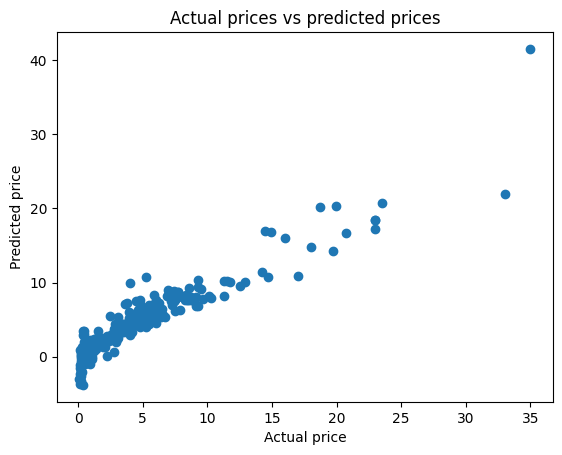

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs predicted prices")
plt.show()

In [ ]:
# Predict on test data using the full pipeline
test_data_prediction = model.predict(X_test)


In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8693753727250833


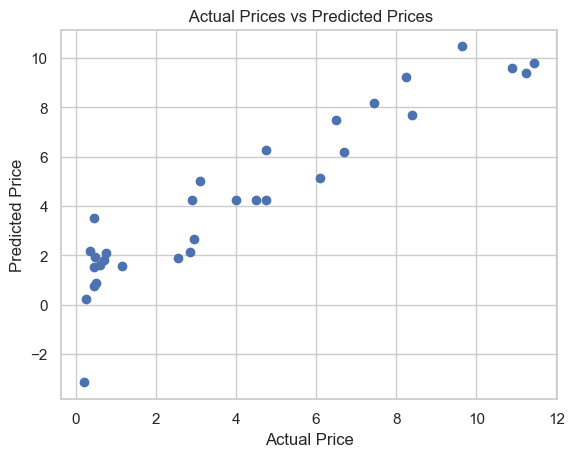

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()